# Chapter 6: Streams(ii): Hierarchies, Recursion and Flattening

The Stream oject in music21 are a container for other music21 objects, which can store these objects with a hierachical and temporal sturcture. A Stream and its subclasses can be stored in other streams \
A common use of nested Streams is modelling a Score (Partitur) with a structure resembling the real life structure of a score. Basically  score consists of parts (Stimmen), which in turn consist of measures (Takte). All of these items exist as classes in music21.

The *music21.corpus* module provides some predefined scores, for example a four-part chorale by Bach. We can parse such a score with the *parse()* function. 

In [2]:
from music21 import *

In [3]:
sBach = corpus.parse('bach/bwv57.8')

Accessing the components of a Stream is the same as accessing elements of a list. 

In [4]:
len(sBach)

9

In [5]:
# first Part
len(sBach[3])

14

In [6]:
# Measure object at index 1 of the first part
len(sBach[3][1])

7

The components of the sBach score are a *Metadata* object, a *StaffGroup* object and four *Part* objects.

### Filtering 

If we don't know the exact kind and amount of objects contained in our part, it is better to filter when we access its components. We can do this by using a function that we already know:

In [7]:
# use the getElementsByClass()
len(sBach.getElementsByClass(stream.Part))
streamParts = sBach.getElementsByClass(stream.Part)

In [8]:
# Amount of Measures of Parts at index 0
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [24]:
# Notes at index 1 in Measure at index 0 in Part
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))

3

We can also pass a string representation of the last section of the class name to getElementsByClass().

In [25]:
len(sBach.getElementsByClass('Part'))

4

Note that this can lead to problems with potential ambiguity. For example *stream.Measure* and *tape.Measure* exist. 

We also have a convenience property for getting Parts:

In [27]:
len(sBach.parts)

4

Since real life measures might act weird sometimes, getElementsByClass(stream.Measure) can lead to problems. The solution is using the *measures*() (returns a Stream of measures) and *measure*() (returns a single measure) functions. \
Examples:

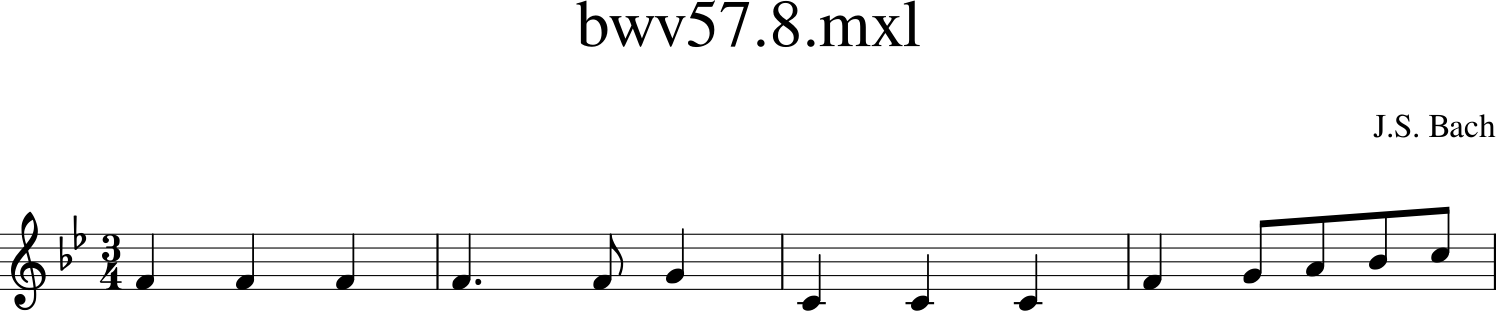

In [29]:
alto = sBach.parts[1] # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(1, 4)
excerpt.show()

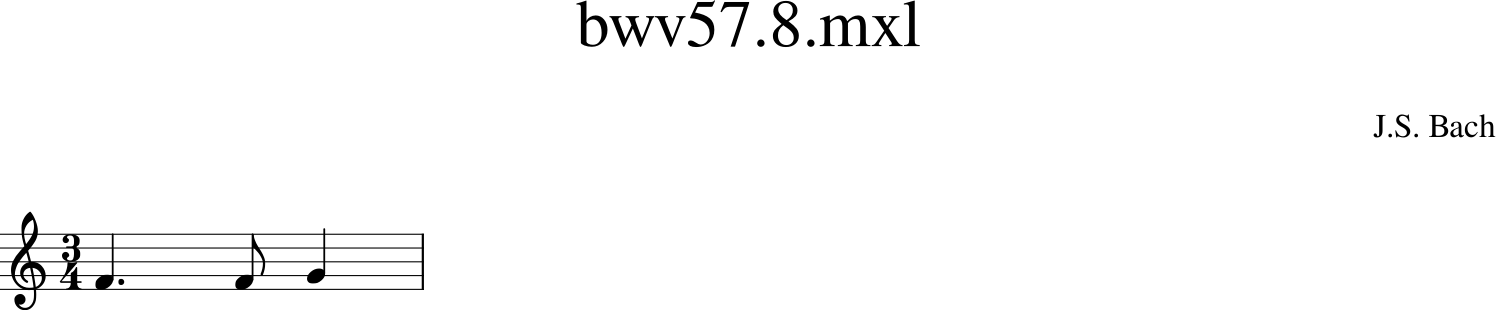

In [30]:
measure2 = alto.measure(2) # measure not measure_s_
measure2.show()

We can also access measures across several parts. A collection of suck measures is called a "measureStack" and can be exepcially useful for computational musicology:

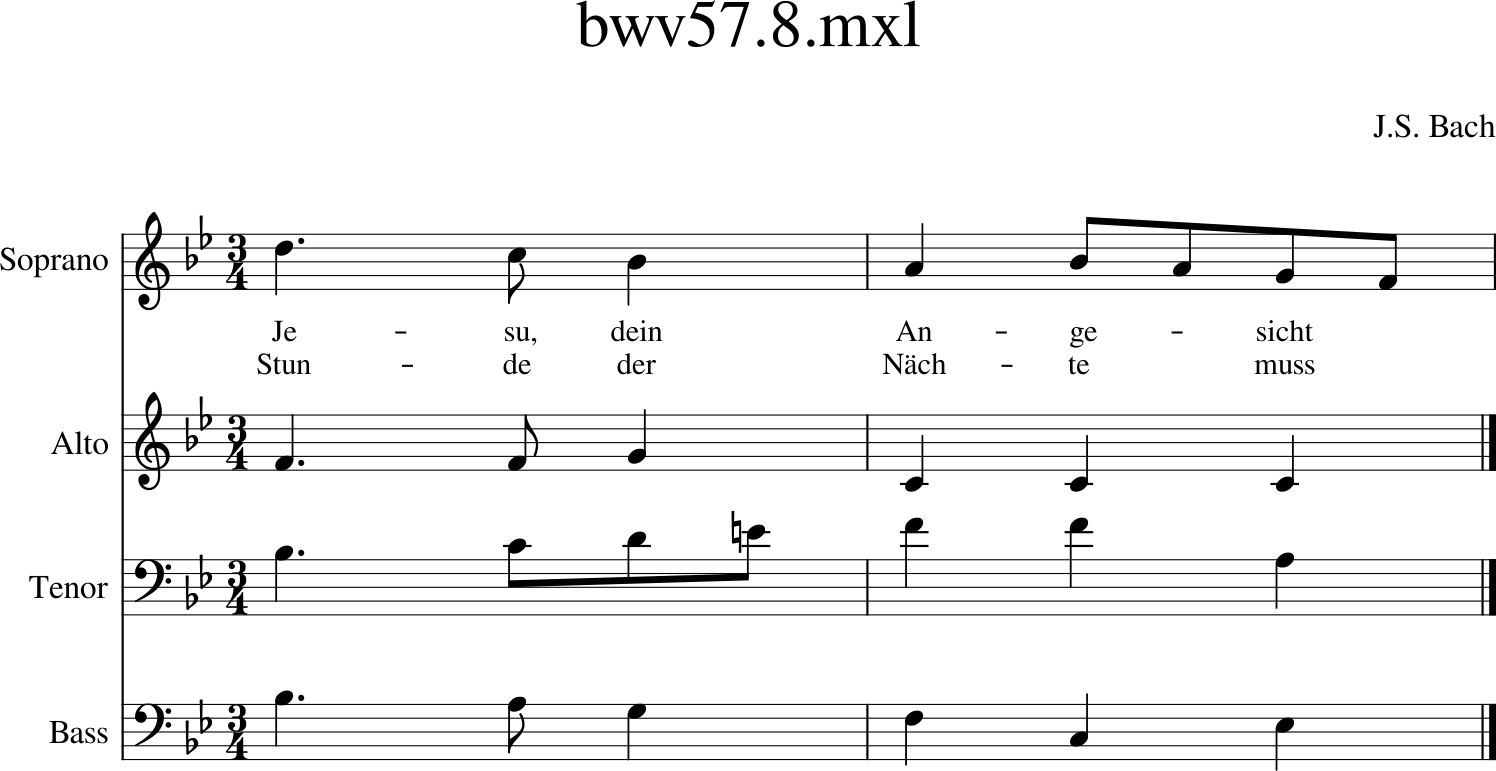

In [32]:
# measureStack consisting of all measrues 2 and 3
measureStack = sBach.measures(2,3)
measureStack.show()

### Recursion

If we want to access all layers of a Stream, we can use the *recurse*() function. 

In [33]:
# Example Stream
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


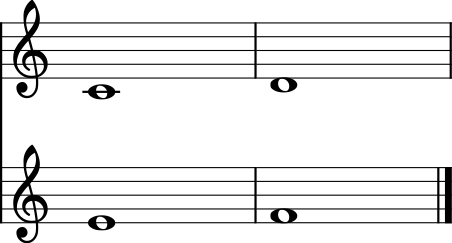

In [34]:
s.show()

In [36]:
# calling recurse
recurseScore = s.recurse()
recurseScore

<music21.stream.iterator.RecursiveIterator for Score:mainScore @:0>

We see that it creates a RecursiveIterator object, which can be used in a loop:

In [39]:
for element in s.recurse():
    print(element.offset, element, element.activeSite)
    print()

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>

0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>

4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>

0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>

0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>

0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>

0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>

4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>

0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>



Note the *.activeSite* attribute, which is basically the Stream the the element lives in. 

We can also use the concept of filtering with the recruse() function:

In [41]:
for element in s.recurse().notes:
    print(element.offset, element, element.activeSite)
    print()

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>

0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>

0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>

0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>



### Flattening

Another way of accessing a Stream is flattening it first. It literally means flattening a multilayered Stream into a single Stream. For example we might want to get to all the Note objects of a complete Score, which is not possible by recursion. \
Note that the flat attribute is not a function and isn't called with brackets:

In [44]:
# single call
s.flat

<music21.stream.Score mainScore_flat>

We created a Stream witht he mainScore_flat id, which contains all the Note objects.

In [47]:
# call in a loop
for element in s.flat:
    print(element.offset, element, element.activeSite)
    print()

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>

0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>

4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>

4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>



Note that the offset is not longer 0.0, but measured for the start of the score being flattened.

Example with a larger Score:

In [48]:
# Amount of Notes in sBach
len(sBach.getElementsByClass(note.Note))

0

In [49]:
len(sBach.flat.getElementsByClass(note.Note))

150

### Offsets

***Element offsets are always relative to the Stream that contains them!*** \
For example the first Note in a Measure has an offset of 0. \
Example:

In [51]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [53]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [54]:
n.getOffsetBySite(m)

1.0

The offset of measure eight is 21 and the offest of the second Not in this Measure is 1.

Note that flattening shifts the offesets of elements in a flattened structure. \
Example:

In [57]:
pFlat = sBach.parts[0].flat
indexN = pFlat.index(n) # get the index of n, which was defined above
pFlat[indexN]

<music21.note.Note E->

In [58]:
pFlat[indexN].offset

22.0

The Note now has the offset of the Measure (21) plus the Note offset inside the Measure(1)